# 입문자를 위한, 파이썬/R 데이터 분석  

]

## Today's mission

- 알고리즘 : Decision Tree vs Random Forest
- 알고리즘 : LightGBM & XGBoost(eXtra Gradient Boost)
- 실습 : 경진대회 베이스라인 코드설명

]

## 알고리즘 : Decision Tree vs Random Forest

- Decision Tree와 Random Forest에 대해 간단히 정리하고, Random Forest로 분석한 예제를 소개하도록 하겠습니다.

### 1. Decision Tree

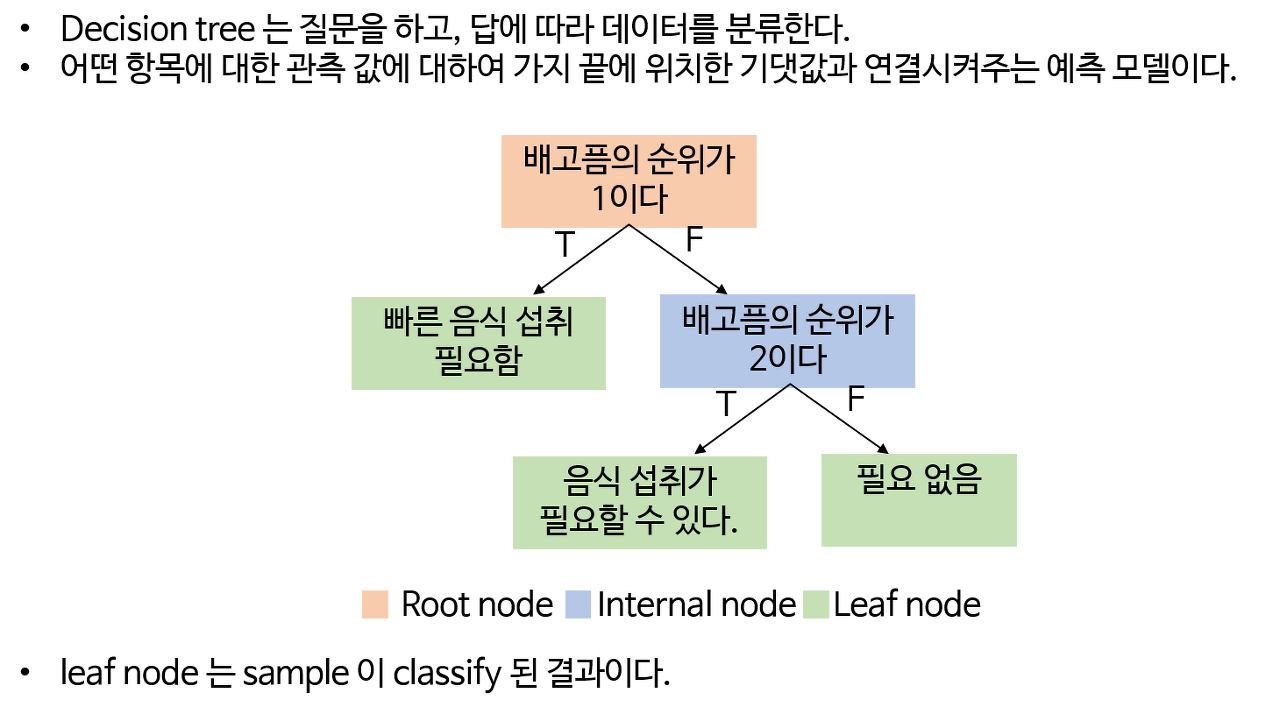
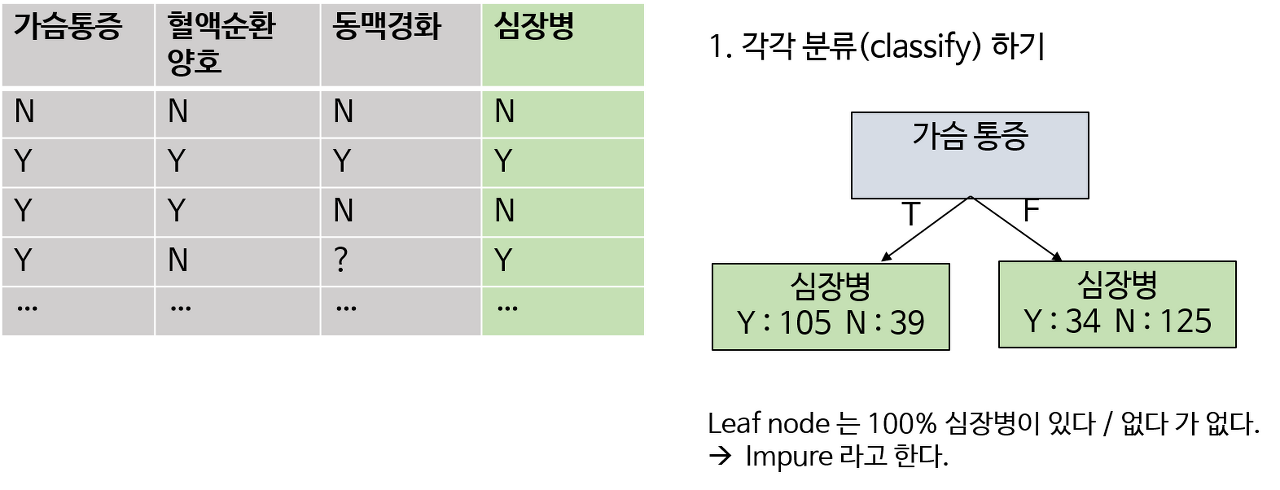

- Decision tree를 만드는 법

1) 각각의 attributes 들을 classiy합니다.

예를 들어 가슴통증으로 분류하게 되면, 가슴통증이 있을 때 심장병인 사람이 105명, 아닌 사람이 39명입니다. 이를 통해 decision tree에서는 어느 질문에 답을 했을 때 이 것이 100% 심장병이다 / 심장병이 아니다 라고 판단할 수 없음을 알 수 있습니다. 이를 impure 하다 라고 합니다. 여기서 impure는 불순물이 있다, 부정확하다는 뜻입니다. 

2) attribute의 impurity 비교하기 

그럼 impurity가 낮을수록 classify 결과가 좋은거겠죠? attribute들 중 impurity가 제일 낮은 것을 root node로 하고, leaf node를 다시 다른 attribute로 classify하는 과정을 반복합니다. 그 결과는 다음과 같아질 것입니다. 

3) 예상 결과 

계속 진행하다보면(tree가 깊어지면) 모든 데이터가 100% 분류되어 overfitting이 일어나게 됩니다. 

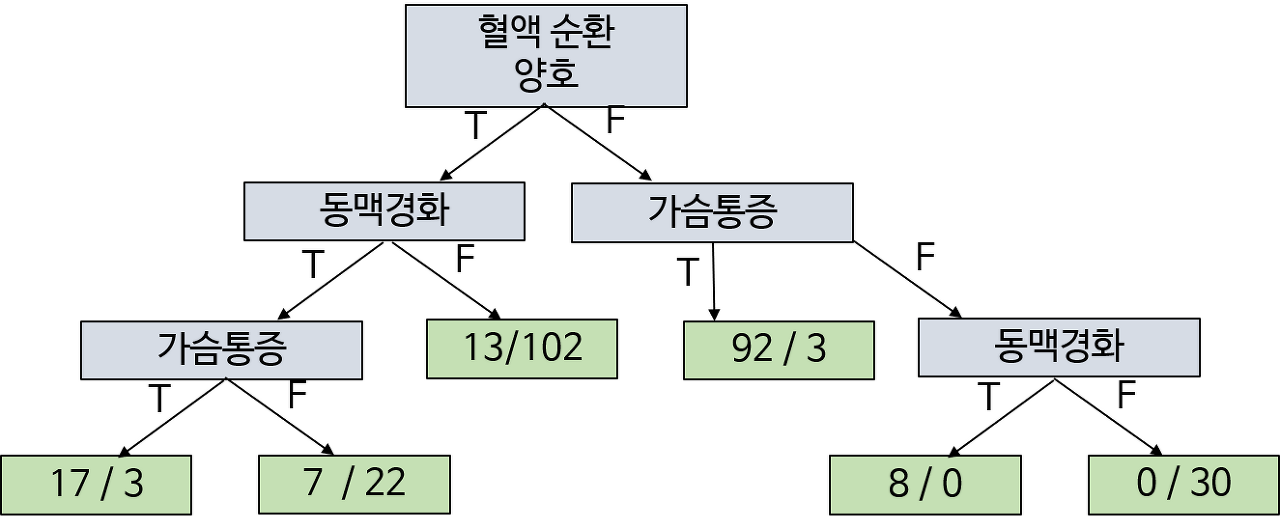

### 2. Random Forest

참고 : [랜덤 포레스트](https://ko.wikipedia.org/wiki/%EB%9E%9C%EB%8D%A4_%ED%8F%AC%EB%A0%88%EC%8A%A4%ED%8A%B8)

참고 : [군중은 똑똑하다 — Random Forest](https://medium.com/@deepvalidation/title-3b0e263605de)

랜덤 포레스트는 여러 개의 결정트리(Decision Tree)를 활용한 배깅 방식의 대표적인 알고리즘

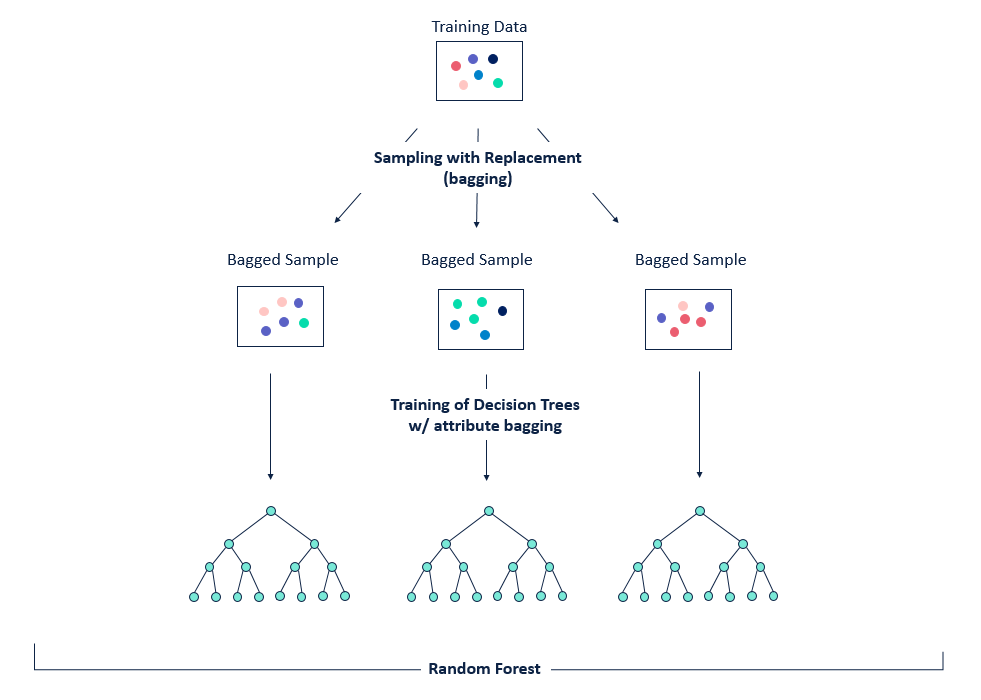

##### 장점
- 결정 트리의 쉽고 직관적인 장점을 그대로 가지고 있음
- 앙상블 알고리즘 중 비교적 빠른 수행 속도를 가지고 있음
- 다양한 분야에서 좋은 성능을 나타냄

##### 단점
- 하이퍼 파라미터가 많아 튜닝을 위한 시간이 많이 소요됨

##### (cf) 배깅(Bagging)이란?
배깅(Bagging)은 Bootstrap Aggregating의 약자로, 보팅(Voting)과는 달리 동일한 알고리즘으로 여러 분류기를 만들어 보팅으로 최종 결정하는 알고리즘

**배깅은 다음과 같은 방식으로 진행이 됩니다.

(1) 동일한 알고리즘을 사용하는 일정 수의 분류기 생성  
(2) 각각의 분류기는 부트스트래핑(Bootstrapping)방식으로 생성된 샘플데이터를 학습  
(3) 최종적으로 모든 분류기가 보팅을 통해 예측 결정

※ 부트스트래핑 샘플링은 전체 데이터에서 일부 데이터의 중첩을 허용하는 방식

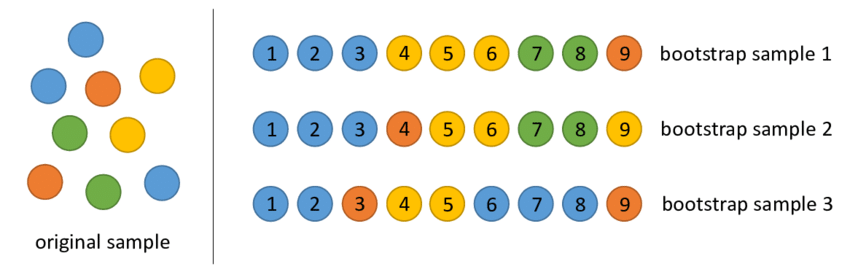


### - Random Forest 만드는 법

Decision Tree에서 tree가 여러개인 것이 forest로, 위에 언급한 것처럼 Decision Tree는 기존의 데이터를 분류하는 것이기 때문에 overfitting이 일어나기 쉽습니다. 이를 완화하는 방법이 Radom Forest입니다. 이름 속에 모든 내용이 담겨있죠.


#### 1) Building
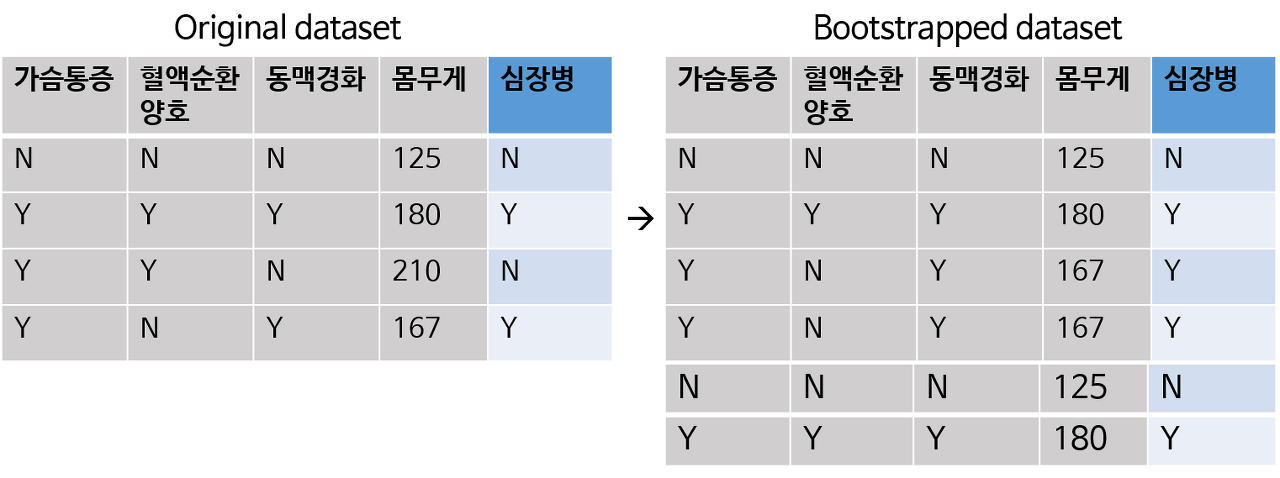

데이터셋을 만들 때, Random Forest는 original dataset에서 랜덤으로 데이터를 뽑아 Bootstrapped dataset을 만듭니다. Bootstrapping 이란 표본집단에서 표본을 랜덤으로 여러 번 뽑아서 이를 통해 전체집합을 나타내는 의미를 가지고 있습니다. 이 때 bootsrapped dataset은 똑같은 게 여러 번 중복 될 수 있습니다. 이 다음 Decision Tree를 만들게 되는데, 본래 Decision Tree에서는 모든 attribute의 impurity를 비교해서 각 node를 결정했다면, Random Forest에서는 attribute 중 몇 개만 비교해서 node를 결정합니다. 결과적으로 아주 많은 Decision Tree가 만들어집니다.

#### 2) Bagging
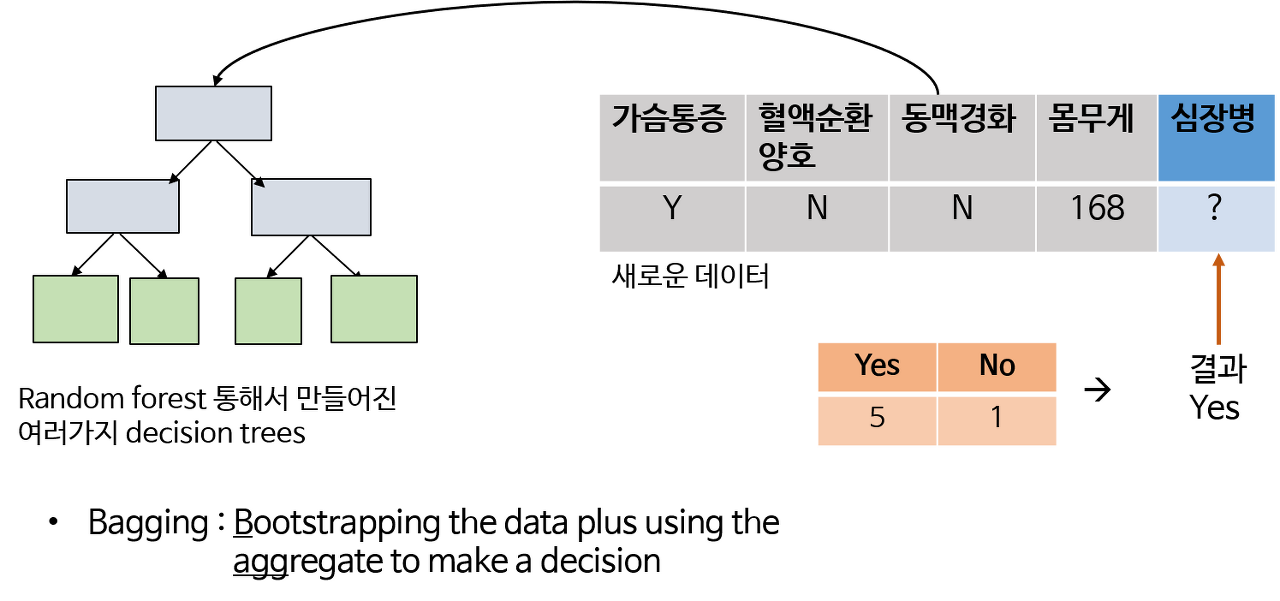


1단계에서 만들어진 여러가지 Decision Tree에 새로운 데이터를 넣고, 그 결과를 합산합니다. 이를 Bagging 이라고 하며, 위의 예시에서 주어진 새로운 데이터는, yes 가 더 많으므로 yes로 예측되어집니다.

#### 3) Estimating
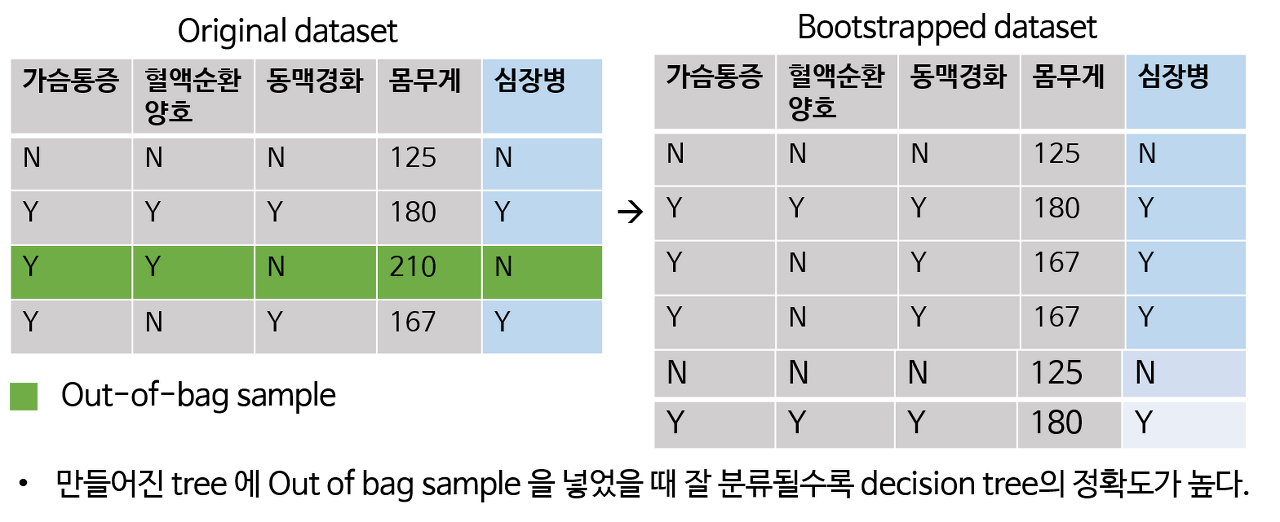

Random Forest에서 build하는 과정에서 bootstrapped dataset을 만들 때 기존 데이터에서 뽑히지 않은 데이터가 있었습니다. 이를 Out-of-Bag sample이라고 합니다. 이는 만들어진 Decision Tree들을 평가하는 데 중요하게 쓰입니다.

만들어진 tree 에 Out-of-Bag sample 을 넣었을 때 잘 분류될 수록 tree의 정확도가 높다고 볼 수 있습니다.

### 랜덤포레스트 하이퍼 파라미터 튜닝

랜덤포레스트는 트리기반의 하이퍼 파라미터에 배깅, 부스팅, 학습, 정규화 등을 위한 하이퍼 파라미터까지 추가되므로 튜닝할 파라미터가 많습니다.

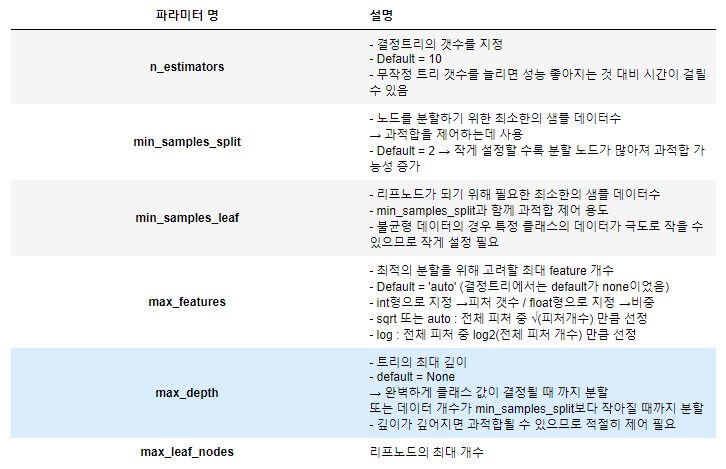

### 3. 예제 : Kaggle - Titanic data 

In [1]:
from numpy import *
from pylab import *
from random import *
from pandas import *
import pandas as pd

In [2]:
train_data = pd.read_csv("data/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
arr = train_data.values
arr

array([[1, 0, 3, ..., 7.25, nan, 'S'],
       [2, 1, 1, ..., 71.2833, 'C85', 'C'],
       [3, 1, 3, ..., 7.925, nan, 'S'],
       ...,
       [889, 0, 3, ..., 23.45, nan, 'S'],
       [890, 1, 1, ..., 30.0, 'C148', 'C'],
       [891, 0, 3, ..., 7.75, nan, 'Q']], dtype=object)

In [4]:
n = len(arr)
print(n)

891


In [5]:
data = zeros((n,6))
data

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [6]:
for i in range(n):
    if arr[i,1] == 1:  # survised 
        data[i,0] = 1
    else:
        data[i,0] = -1
    data[i,1] = arr[i,2]   # class
    if arr[i,4] =="male":
        data[i,2] = -1   # male
    else:
        data[i,2] = 1    # female
    tmp = str(arr[i,5])
    if tmp == "nan":
        data[i,3] = 0 # age
    else:
        data[i,3] = arr[i,5]
    data[i,4] = arr[i,6]  # SibSp
    data[i,5] = arr[i,7]  # ParCh

In [7]:
print(data)

[[-1.  3. -1. 22.  1.  0.]
 [ 1.  1.  1. 38.  1.  0.]
 [ 1.  3.  1. 26.  0.  0.]
 ...
 [-1.  3.  1.  0.  1.  2.]
 [ 1.  1. -1. 26.  0.  0.]
 [-1.  3. -1. 32.  0.  0.]]


In [8]:
test_data = pd.read_csv("data/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
arr_test = test_data.values
arr_test

array([[892, 3, 'Kelly, Mr. James', ..., 7.8292, nan, 'Q'],
       [893, 3, 'Wilkes, Mrs. James (Ellen Needs)', ..., 7.0, nan, 'S'],
       [894, 2, 'Myles, Mr. Thomas Francis', ..., 9.6875, nan, 'Q'],
       ...,
       [1307, 3, 'Saether, Mr. Simon Sivertsen', ..., 7.25, nan, 'S'],
       [1308, 3, 'Ware, Mr. Frederick', ..., 8.05, nan, 'S'],
       [1309, 3, 'Peter, Master. Michael J', ..., 22.3583, nan, 'C']],
      dtype=object)

In [10]:
cnt = len(arr_test)
print(cnt)

418


In [11]:
testdata = zeros((cnt,6))
testdata

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [12]:
for i in range(cnt):
    testdata[i,0] = arr[i,2]   # class
    if arr_test[i,3] =="male":
        testdata[i,1] = -1   # male
    else:
        testdata[i,1] = 1    # female
    tmp_test = str(arr_test[i,4])
    if tmp_test == "nan":
        testdata[i,2] = 0 # age
    else:
        testdata[i,2] = arr_test[i,4]
    testdata[i,3] = arr_test[i,5]  # SibSp
    testdata[i,4] = arr_test[i,6]  # ParCh

In [13]:
print(testdata)

[[ 3.  -1.  34.5  0.   0.   0. ]
 [ 1.   1.  47.   1.   0.   0. ]
 [ 3.  -1.  62.   0.   0.   0. ]
 ...
 [ 3.  -1.  38.5  0.   0.   0. ]
 [ 2.  -1.   0.   0.   0.   0. ]
 [ 2.  -1.   0.   1.   1.   0. ]]


In [14]:
# skicit-learn 패키지에 있는 Random Forest Classifier을 사용합니다
from sklearn.ensemble import RandomForestClassifier

In [15]:
# 여기서 판단하는 것은 y = survived 의 여부
y = train_data["Survived"]

In [16]:
# 분류에 사용할 feature (X)는 [Pclass, Sex, SibSp(형제 동승 여부), Parch(부모/자녀 동승 여부)] 
# 여기서 Age의 feature를 제외한 이유는, 각 질문에 의해 binary classification이 되도록 해야하므로, 
# Age를 사용하려면 특정 나이(기준) 이상은 1, 이하는 0 등으로 data를 바꾸면 됩니다. 
# 하지만 여기서 Age는 누락된 경우가 많으므로 제외합니다.
features = ["Pclass", "Sex", "SibSp", "Parch"] 
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

In [17]:
X

,Pclass,SibSp,Parch,Sex_female,Sex_male
0,3,1,0,0,1
1,1,1,0,1,0
2,3,0,0,1,0
3,1,1,0,1,0
4,3,0,0,0,1
...,...,...,...,...,...
886,2,0,0,0,1
887,1,0,0,1,0
888,3,1,2,1,0
889,1,0,0,0,1


In [18]:
X_test

,Pclass,SibSp,Parch,Sex_female,Sex_male
0,3,0,0,0,1
1,3,1,0,1,0
2,2,0,0,0,1
3,3,0,0,0,1
4,3,1,1,1,0
...,...,...,...,...,...
413,3,0,0,0,1
414,1,0,0,1,0
415,3,0,0,0,1
416,3,0,0,0,1


In [19]:
# n_estimatore:#of trees 
# max_depth : depth of trees. to avoid overfitting. 
# default = max_depth=none (impurity=0 될 때까지 leafnode 생김..train_set 정확도 100%)
# 각 parameter, n_estimators 는 생성할 tree의 개수이고, max_depth는 tree의 깊이를 5로 제한하겠다는 뜻입니다.
# max_depth는 deafult가 none으로, 기존 데이터가 100%분류될 때까지 tree가 만들어지게 되면 overfitting이 발생합니다. 
# 이를 제한함으로써 overfitting을 완화할 수 있습니다. 
model = RandomForestClassifier(n_estimators=100)#, max_depth=3) 

In [20]:
model

RandomForestClassifier()

In [21]:
model.fit(X, y)

RandomForestClassifier()

In [22]:
predictions = model.predict(X_test)

In [23]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('data/my_prediction.csv', index=False)

In [24]:
output

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [25]:
my_prediction = pd.read_csv("data/my_prediction.csv")

In [26]:
print(my_prediction)

     PassengerId  Survived
0            892         0
1            893         1
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]


In [27]:
result = my_prediction.values
result

array([[ 892,    0],
       [ 893,    1],
       [ 894,    0],
       [ 895,    0],
       [ 896,    1],
       [ 897,    0],
       [ 898,    1],
       [ 899,    1],
       [ 900,    1],
       [ 901,    0],
       [ 902,    0],
       [ 903,    0],
       [ 904,    1],
       [ 905,    0],
       [ 906,    1],
       [ 907,    1],
       [ 908,    0],
       [ 909,    0],
       [ 910,    1],
       [ 911,    1],
       [ 912,    0],
       [ 913,    0],
       [ 914,    1],
       [ 915,    0],
       [ 916,    1],
       [ 917,    0],
       [ 918,    1],
       [ 919,    0],
       [ 920,    0],
       [ 921,    0],
       [ 922,    0],
       [ 923,    0],
       [ 924,    0],
       [ 925,    0],
       [ 926,    0],
       [ 927,    0],
       [ 928,    1],
       [ 929,    1],
       [ 930,    0],
       [ 931,    0],
       [ 932,    0],
       [ 933,    0],
       [ 934,    0],
       [ 935,    1],
       [ 936,    1],
       [ 937,    0],
       [ 938,    0],
       [ 939,

In [28]:
cnt = len(result)
print(cnt)

418


In [29]:
#!pip install --upgrade matplotlib

In [30]:
matplotlib.__version__

'3.5.1'

In [31]:
# 3D plot (class=c, age=a, sex=s)
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

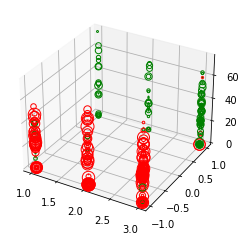

In [32]:
s1 = 0
s0 = 0
ax = plt.axes(projection ="3d")
for i in range(cnt):
    c = testdata[i,0] #class
    s = testdata[i,1] #sex
    a = testdata[i,2] #age
    if result[i,1] == 0: 
        s0 = s0 + 0.05
        ax.plot3D([c],[s],[a],'ro',markerfacecolor='none',markersize=s0)
    else:
        s1 = s1 + 0.05
        ax.plot3D([c],[s],[a],'og',markerfacecolor='none',markersize=s1)
        
# predict 결과)  빨강 : 생존하지 못함.  초록 : 생존

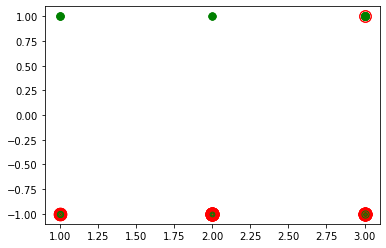

In [33]:
# plot the data in two categories - sex and pclass 
s1 = 0 
s0 = 0 
for i in range(cnt):
    c = testdata[i,0]
    s = testdata[i,1]
    if result[i,1] == 0:
        s0 = s0 + 0.05
        plot(c,s,'ro',markerfacecolor='none', markersize = s0)
    else:
        s1 = s1 + 0.05
        plot(c,s,'go', markerfacecolor='none', markersize = s1)
        
# predict 결과) 빨강: 생존하지 못함. 초록: 생존.

### (참고)  "Intuition behind Random Forest "
> "Explaining random forest from scratch"

- toc: true
- badges: true
- comments: true
- categories: [randomforest, datascience]
- author: Hitesh Kumar
- image: images/copied_from_nb/img/data.png

### What are we gonna do in this blog?

Learning about what goes behind random forest. What is it that beginner struggles understanding random forest. What makes random forest so powerful. Further, we will discuss intuition behind random forest. Explaining random forest in detail with own handcrafted code and sklearn provided.

### Personal Experience

When i was starting out with Machine Learning. All i could see the hype of Random Forest being powerful and quite handy in use. I was abit curious. So, i started learning about it in depth. It became a bit hard to comprehend the words like `ensemble` and random forest in general. But after understanding it, i can say it's really makes sense why random forest works. I'll be sharing what are my key insights on this. 

### What is the intuition behind Random Forest?

Random Forest is derived from the concept of Decision Tree. Assuming you know what decision trees are. In a nutshell, When we use lots of decision trees (i.e. 20,100,150) to train & predict the input data. This lot (or Group) of decision trees are known as `ensemble`. Rather than using single decision tree to finalize decision. We use many of them. It's same as imagine you have to decide which book to buy for statistics. When you do is talking to many people and then buy which most of the people prefer. 

Another example: Let's say you going to interview. So there will be different rounds of interview and you will be evaluated on different features of yours. Finally, getting selected or not would be what most of the interviewer perceive. If 2 out of 3 agree with selection you will be selected. If 2 out of 3 don't agree with selection, then you will be rejected. 

Same Goes in Random Forest: You take many decision trees (it could be thousands too), for now let's say 100 and each of them trained on random data points(row) of training data. Then you use, testing data and each decision tree will predict according to the feature they have been trained on. 

 > Important: All the decision trees shouldn't be trained on same features. That could lead to biased predictions. 

Training on random features(reason why random forest are called random) allows to create more flexible and ungreedy algorithm. Decision tree uses [greedy algorithm](https://www.edureka.co/community/46109/what-is-greedy-approach-in-decision-tree-algorithm).
So, it's important to feed random features. 

![](https://upload.wikimedia.org/wikipedia/commons/7/76/Random_forest_diagram_complete.png "Credit: https://en.wikipedia.org/wiki/Random_forest")

I hope, you get a bit clarity what it means when we say random forest. Although, your concepts will be totally cleared when you dive into coding the decision tree from scratch.

#Coding our own Random forest

In [34]:
#hide
from sklearn.datasets import make_moons

In [35]:
#hide
mo = make_moons(n_samples=10000, noise=0.4) #creating toy data

In [36]:
#hide
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(mo[0], mo[1], test_size=0.2, random_state=42)

In [37]:
#hide
len(X_train)

8000

Small peak into data and label.We are looking at first 5 data points and their label(or target). As you can see below, Left side array is X and Y value. And Right Side Array is labels of respective row value. 

In [38]:
#collapse-hide
X_train[:5], y_train[:5]

(array([[-0.13934825, -0.63961927],
        [ 0.88606285,  0.82233973],
        [-0.10455107,  0.67395492],
        [ 0.58110557, -0.27856891],
        [ 0.7797405 , -0.26105396]]),
 array([1, 0, 1, 0, 0]))

Just a simple look at our data. Green and Purple are the different classes and in this we have to predict if X and Y coordinates are provided what will be the class of the point. 

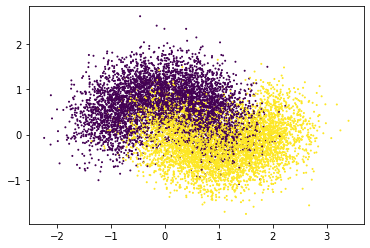

In [39]:
#hide_input
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(mo[0][:,0], mo[0][:,1], c=mo[1], s=1)
plt.show()

In order to create more randomness in training data. We are using shuffle split as provided by [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html). 

> Tip: We can also use ShuffleSplit for spliting into training and testing set.

We already have the testing set. That's why not doing it in this case. I encourage you to try!

In [40]:
from sklearn.model_selection import ShuffleSplit

sh= ShuffleSplit(n_splits=1000, random_state=0, train_size=100, test_size=None)

In random forest it depends how many decision tree we want to use for our evaluation. In this code line, `n_splits` is signifying that there will be 1000 random selected features would be used for 1000 decision tree in our experiment. Above, we also have `train_size` and `test_size` which can help us splitting data in desired ratio. Since, we already have test set. We don't need splitting here. 

In [41]:
#hide
decisiontrees= list()
ds_scores= list()

c=0
for train_index,_  in sh.split(X_train,y_train):
    c+=1
print(c)

1000


In [42]:
#collapse-show
from sklearn.tree import DecisionTreeClassifier

In [43]:
#collapse-hide 

decisiontrees= list() #to store our decision tree which we will train
ds_scores= list()    

for train_idx, test_idx in sh.split(X_train):
    #you dont need this lengthy initialization. I did for explaination
    dt= DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, #min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, #presort='deprecated',
                       random_state=None, splitter='best')
    
    #using the random data for training
    dt.fit(X_train[train_idx], y_train[train_idx])
    #appending model so that we can use for prediction
    decisiontrees.append(dt)
    ds_scores.append(dt.score(X_test, y_test))

In [44]:
len(ds_scores)

1000

In [45]:
#hide
import numpy as np

np.mean(ds_scores)
ds_scores= np.array(ds_scores)

In [46]:
ds_scores

array([0.7355, 0.856 , 0.863 , 0.8415, 0.8315, 0.834 , 0.809 , 0.853 ,
       0.802 , 0.8475, 0.8105, 0.832 , 0.794 , 0.855 , 0.7685, 0.7565,
       0.8205, 0.7915, 0.8035, 0.8315, 0.771 , 0.835 , 0.813 , 0.844 ,
       0.8245, 0.831 , 0.8365, 0.8265, 0.788 , 0.8065, 0.7755, 0.8405,
       0.814 , 0.7815, 0.8215, 0.8375, 0.84  , 0.7825, 0.8225, 0.8005,
       0.8275, 0.8345, 0.859 , 0.811 , 0.833 , 0.813 , 0.813 , 0.856 ,
       0.805 , 0.8405, 0.8315, 0.8365, 0.8255, 0.844 , 0.855 , 0.825 ,
       0.844 , 0.849 , 0.8065, 0.8165, 0.813 , 0.75  , 0.8155, 0.828 ,
       0.82  , 0.772 , 0.8315, 0.85  , 0.811 , 0.858 , 0.783 , 0.8485,
       0.8445, 0.774 , 0.826 , 0.8285, 0.844 , 0.832 , 0.8475, 0.8485,
       0.742 , 0.841 , 0.847 , 0.7965, 0.8335, 0.8185, 0.8285, 0.786 ,
       0.846 , 0.821 , 0.841 , 0.814 , 0.84  , 0.8365, 0.8385, 0.8345,
       0.8375, 0.8205, 0.819 , 0.8135, 0.7625, 0.8385, 0.84  , 0.8475,
       0.8165, 0.8315, 0.839 , 0.798 , 0.809 , 0.831 , 0.807 , 0.8495,
      

In [47]:
import os
os.environ['PATH'] = os.environ['PATH'] + os.pathsep + 'C:\ProgramData\Anaconda3\Library\bin'

In [48]:
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 dtree.dot 파일을 생성함. 
export_graphviz(dt, out_file="data/dtree.dot", impurity=True, filled=True)

In [49]:
#!pip install graphviz

In [50]:
import graphviz

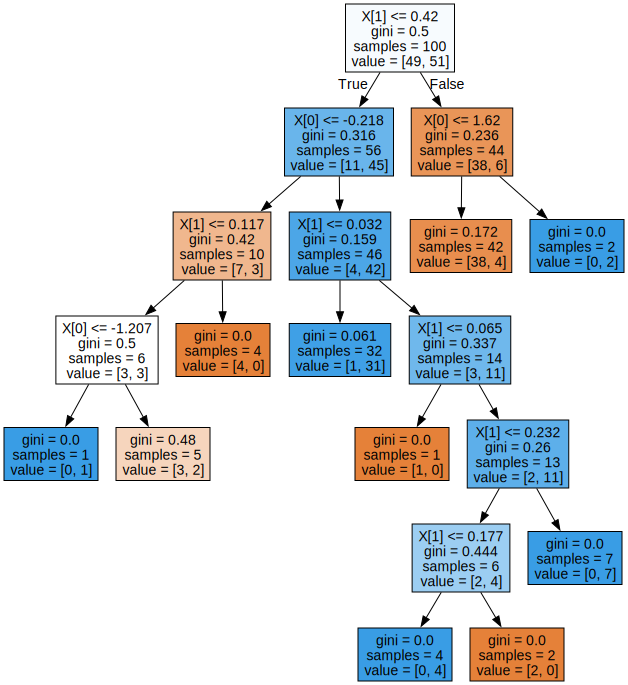

In [51]:
# 위에서 생성된 tree.dot 파일을 Graphviz 읽어서 Jupyter Notebook상에서 시각화 
with open("data/dtree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

Using our `decisiontree` list for making prediction seperately on testing data. And appending it in a new list. So that, we can use it further.

In [52]:
#collapse-show
predictions=[]
for tree in decisiontrees:
    predictions.append(tree.predict(X_test))

Let's see how our predicted labels are like?  Below you can see `array([0, 0, 0, ..., 0, 0, 0]), 2000` . We get an array of predicted labels and Note that 2000 represents number of decision trees we used for our experiment. 

In [53]:
#collapse-hide 
pred= decisiontrees[10].predict(X_test)
pred, len(pred)

(array([0, 1, 1, ..., 0, 1, 1]), 2000)

As we talked from starting that we will take label as final label if it is predicted by the majority. Statistically, it means, we need to take mode of our predicted output. Mode among prediction of 2000 decision trees. We can use `scipy` for our purpose. 

In [54]:
#collapse-show
from scipy import stats

y_pred_majority_votes, n_votes= stats.mode(predictions, axis=0) #axis zero means along the column

In [55]:
#hide
predictions[:5]

[array([0, 1, 0, ..., 0, 0, 1]),
 array([0, 1, 1, ..., 0, 1, 1]),
 array([0, 1, 1, ..., 0, 1, 1]),
 array([0, 1, 1, ..., 0, 1, 1]),
 array([0, 1, 1, ..., 0, 1, 1])]

In [56]:
#collapse-show
y_pred_majority_votes.shape, y_test.shape

((1, 2000), (2000,))

As we can see, we have predicted label and test_set label in different shape. We need to convert `y_pred_majority_votes` in same size like `y_test`. So we reshape the array simply. 

Now calculating the accuracy of our self constructed random forest model.

In [57]:
#collapse-show
from sklearn.metrics import accuracy_score
accuracy_score(y_test,  y_pred_majority_votes.reshape([-1]))

0.8745

> Note: We are reshaping predicted array

### Random Forest By Sklearn

This is rather more famous thing to do. Ofcourse saves time and very quick. We are seeing how does it perform compared to our random forest. 

In [58]:
from sklearn.ensemble import RandomForestClassifier

For fair a comparison, we are here using 2000 decision tree again. Let's see how it does? 

In [59]:
rnf = RandomForestClassifier(2000, n_jobs=-1)

In [60]:
rnf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=2000, n_jobs=-1)

In [61]:
#hide
y_pred= rnf.predict(X_test)
y_pred

array([0, 1, 1, ..., 0, 1, 1])

Predicting accuracy now:

In [62]:
accuracy_score(y_test, y_pred)

0.855

Random Forest Handcrafted gives: 0.86

Random Forest from Sklearn: 0.85

Wooo.. Quite nice!! But in most of the cases sklearn provided Random Forest is more optimized and quicker. So, i hope this was helpful for understanding what random forest is all about. And How it works.